Reference: This code is adopted from the Lab 7 and is modified for working with rank prediction.

# Imports & Downloading Dataset

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Get file id from the link
#https://drive.google.com/file/d/1Aseiwo5Ix9DzId1r4ibJ_qZeegULz2wb/view?usp=sharing
id = "1Aseiwo5Ix9DzId1r4ibJ_qZeegULz2wb"

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('IPBroadcaster_Input_2018-05-27_0.log')

## Print First 25 lines

In [2]:
log_file = "IPBroadcaster_Input_2018-05-27_0.log"
i = 0
with open(log_file,'r', encoding="cp1252") as f:
  for line in f:
    print(line)
    i += 1
    if i == 25:
      break

---- [V2.38] ---- IPBroadcaster Input Log created at: 2018-05-27 00:00:00

$X¦N¦3853E¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D40¦0¦0

$H¦N¦38568¦FR3¦C¦5B09F501¦0¦FFFF¦0

$X¦N¦3853F¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D41¦0¦0

$H¦N¦38569¦FR3¦C¦5B09F502¦0¦FFFF¦0

$X¦N¦38540¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D42¦0¦0

$H¦N¦3856A¦FR3¦C¦5B09F503¦0¦FFFF¦0

$X¦N¦38541¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D43¦0¦0

$H¦N¦3856B¦FR3¦C¦5B09F504¦0¦FFFF¦0

$X¦N¦38542¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D44¦0¦0

$W¦N¦F06¦¦BCDE¦4A¦58¦B51¦0¦0¦4¦T1T¦ABE¦T2T¦B04¦T3¦A6E¦T4T¦AFA

$H¦N¦3856C¦FR3¦C¦5B09F505¦0¦FFFF¦0

$X¦N¦38543¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D45¦0¦0

$H¦N¦3856D¦FR3¦C¦5B09F506¦0¦FFFF¦0

$X¦N¦38544¦¦Unknown¦Indianapolis Motor Speedway¦2.5¦I¦0¦0¦0¦U¦0¦0¦0¦5B0A2D46¦0¦0

$H¦N¦3856E¦FR3¦C¦5B09F507¦0¦FFFF¦0

$X¦N¦38545¦¦Unknown¦Indianapolis Mot


## Task 1:
__Take a look at `Timing Data Access` and `Enhanced Results Protocol Definition` superficially and suggest two ways to get lap times for each car.__

1. We can use the 'last_laptime' to know the lap times after they are done and the next lap is started.
2. We can use the 'elapsed_time' and 'completed_laps' to calculate the lap times.

## Print the first 25 records of completed laps

In [3]:
log_file = "IPBroadcaster_Input_2018-05-27_0.log"
i = 0
with open(log_file,'r', encoding="cp1252") as f:
  for line in f:
    if line.startswith('$C'):
      print(line)
      i += 1
      if i == 25:
        break   

$C¦U¦0¦S10¦1¦9¦0¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦1¦0¦Active¦G¦0¦0¦1¦0

$C¦R¦0¦S10¦1¦9¦0¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦1¦0¦Active¦G¦0¦0¦1¦0

$C¦U¦0¦S10¦1¦9¦0¦0¦1ED976¦0¦T¦0¦0¦0¦0¦0¦0¦1¦0¦Active¦G¦0¦0¦1¦0

$C¦R¦0¦S10¦1¦9¦0¦0¦1ED976¦0¦T¦0¦0¦0¦0¦0¦0¦1¦0¦Active¦G¦0¦0¦1¦0

$C¦U¦1¦S10¦1¦9¦0¦1¦3DD2DC¦1EF966¦T¦1EF966¦1¦0¦0¦0¦0¦1¦1EF966¦Active¦G¦0¦0¦1¦0

$C¦U¦2¦S10¦1¦9¦0¦2¦5D757F¦1FA2A3¦P¦1EF966¦1¦0¦0¦0¦0¦1¦1EF966¦Active¦G¦1¦2¦1¦0

$C¦U¦0¦R.I¦1¦20¦0¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦1¦0¦Active¦U¦0¦0¦1¦0

$C¦U¦10000¦R.I¦2¦22¦1¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦2¦0¦Active¦U¦0¦0¦2¦0

$C¦U¦20000¦R.I¦3¦12¦2¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦3¦0¦Active¦U¦0¦0¦3¦0

$C¦U¦30000¦R.I¦4¦1¦3¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦4¦0¦Active¦U¦0¦0¦4¦0

$C¦U¦40000¦R.I¦5¦18¦4¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦5¦0¦Active¦U¦0¦0¦5¦0

$C¦U¦50000¦R.I¦6¦21¦5¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦6¦0¦Active¦U¦0¦0¦6¦0

$C¦U¦60000¦R.I¦7¦13¦6¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦7¦0¦Active¦U¦0¦0¦7¦0

$C¦U¦70000¦R.I¦8¦3¦7¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦8¦0¦Active¦U¦0¦0¦8¦0

$C¦U¦80000¦R.I¦9¦9¦8¦0¦0¦0¦T¦0¦0¦0¦0¦0¦0¦9¦0¦Active¦U¦0¦0¦9¦0

$C¦U¦90000¦R.I¦A¦14¦9¦0¦0¦0

## Task 2:

__First 10 columns of completed laps from `INDYCAR Timing Data Document v2018.1.pdf` provided below:__

__Time columns are in ten thousand seconds. Identify them__

In [4]:
column_names= ['command', 'type_of_record', 'sequence_number', 'preamble', 'rank', 
         'car_number', 'unique_id', 'completed_laps', 'elapsed_time',
         'last_laptime', 'lap_status', 'best_laptime', 'best_lap',
         'time_behind_leader', 'laps_behind_leader', 'time_behind_prec', 
         'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
         'current_status', 'track_status', 'pit_stop_count', 
         'last_pitted_lap', 'start_position', 'laps_led']


hex_columns= ['sequence_number','rank', 'unique_id', 'completed_laps',
           'elapsed_time', 'last_laptime', 'best_laptime', 'best_lap',
           'time_behind_leader', 'laps_behind_leader', 'time_behind_prec',
           'laps_behind_prec', 'overall_rank', 'overall_best_laptime',
           'pit_stop_count', 'last_pitted_lap', 'start_position', 'laps_led']

time_columns= ['elapsed_time', 'last_laptime', 'best_laptime', 
               'time_behind_leader', 'time_behind_prec', 'overall_best_laptime']

# Get Completed Laps Data and Write to a CSV File

In [5]:
# converts hexadecimal columns to decimal
def hex2dec(record, cols):
  for col in cols:
    record[col] = int(record[col], 16)


# Time columns are in ten thousand sec. Converts to sec
def tenThousandsToSec(record, cols):
  for col in cols:
    record[col] = record[col] / 10000.0

In [6]:
log_file = "IPBroadcaster_Input_2018-05-27_0.log"


csv_file_name = 'completed_laps.csv'
csv_file = open(csv_file_name, 'w')

writer = csv.DictWriter(csv_file, fieldnames=column_names)

writer.writeheader()

i = 0
with open(log_file,'r', encoding="cp1252") as f:
  for line in f:
    if line.startswith("$C"):
      #print(line)
      # each line has \n at the end: remove and split
      raw_record = line.replace('\n', '').split('¦')
      
      record = {}
      
      for idx, val in enumerate(raw_record):
        record[column_names[idx]] = val

      hex2dec(record, hex_columns)
      tenThousandsToSec(record, time_columns)

      writer.writerow(record)
      i = i + 1
      if i % 100 == 0:
        print(i, 'records were extracted from the log file')

csv_file.close()
print('CSV file was created')

100 records were extracted from the log file
200 records were extracted from the log file
300 records were extracted from the log file
400 records were extracted from the log file
500 records were extracted from the log file
600 records were extracted from the log file
700 records were extracted from the log file
800 records were extracted from the log file
900 records were extracted from the log file
1000 records were extracted from the log file
1100 records were extracted from the log file
1200 records were extracted from the log file
1300 records were extracted from the log file
1400 records were extracted from the log file
1500 records were extracted from the log file
1600 records were extracted from the log file
1700 records were extracted from the log file
1800 records were extracted from the log file
1900 records were extracted from the log file
2000 records were extracted from the log file
2100 records were extracted from the log file
2200 records were extracted from the log fi

# Read The CSV File

In [7]:
dataset = pd.read_csv(csv_file_name)

dataset.head(10)

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,$C,U,0,S10,1,9.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
1,$C,R,0,S10,1,9.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
2,$C,U,0,S10,1,9.0,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
3,$C,R,0,S10,1,9.0,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
4,$C,U,1,S10,1,9.0,0,1,405.1676,202.9926,T,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,0,0,1,0
5,$C,U,2,S10,1,9.0,0,2,612.4927,207.3251,P,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,1,2,1,0
6,$C,U,0,R.I,1,20.0,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,U,0,0,1,0
7,$C,U,65536,R.I,2,22.0,1,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,2,0.0000,Active,U,0,0,2,0
8,$C,U,131072,R.I,3,12.0,2,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,3,0.0000,Active,U,0,0,3,0
9,$C,U,196608,R.I,4,1.0,3,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,4,0.0000,Active,U,0,0,4,0


In [8]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   command               19427 non-null  object 
 1   type_of_record        19427 non-null  object 
 2   sequence_number       19427 non-null  int64  
 3   preamble              19427 non-null  object 
 4   rank                  19427 non-null  int64  
 5   car_number            19426 non-null  float64
 6   unique_id             19427 non-null  int64  
 7   completed_laps        19427 non-null  int64  
 8   elapsed_time          19427 non-null  float64
 9   last_laptime          19427 non-null  float64
 10  lap_status            19427 non-null  object 
 11  best_laptime          19427 non-null  float64
 12  best_lap              19427 non-null  int64  
 13  time_behind_leader    19427 non-null  float64
 14  laps_behind_leader    19427 non-null  int64  
 15  time_behind_prec   

In [9]:
dataset.car_number.unique()

array([ 9., 20., 22., 12.,  1., 18., 21., 13.,  3., 14.,  4., 98., 19.,
       28., 23., 30., 32.,  6., 33., 59., 29., 88., 25., 24., 26., 64.,
       66.,  7., 10., 15., 60., 27., 17., nan])

## Lets drop nan and convert car number to integer

In [10]:
dataset = dataset.dropna()
dataset.car_number = dataset.car_number.astype('int')
dataset.head(10)

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,$C,U,0,S10,1,9,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
1,$C,R,0,S10,1,9,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
2,$C,U,0,S10,1,9,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
3,$C,R,0,S10,1,9,0,0,202.1750,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,G,0,0,1,0
4,$C,U,1,S10,1,9,0,1,405.1676,202.9926,T,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,0,0,1,0
5,$C,U,2,S10,1,9,0,2,612.4927,207.3251,P,202.9926,1,0.0,0,0.0,0,1,202.9926,Active,G,1,2,1,0
6,$C,U,0,R.I,1,20,0,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,1,0.0000,Active,U,0,0,1,0
7,$C,U,65536,R.I,2,22,1,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,2,0.0000,Active,U,0,0,2,0
8,$C,U,131072,R.I,3,12,2,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,3,0.0000,Active,U,0,0,3,0
9,$C,U,196608,R.I,4,1,3,0,0.0000,0.0000,T,0.0000,0,0.0,0,0.0,0,4,0.0000,Active,U,0,0,4,0


In [11]:
dataset.car_number.unique()

array([ 9, 20, 22, 12,  1, 18, 21, 13,  3, 14,  4, 98, 19, 28, 23, 30, 32,
        6, 33, 59, 29, 88, 25, 24, 26, 64, 66,  7, 10, 15, 60, 27, 17])

## Lets find the cars that completed the race.

In [12]:
dataset.completed_laps.max()

200

In [13]:
completed_cars = dataset[dataset.completed_laps == 200].car_number.unique()
completed_cars

array([12, 20,  9, 27, 28, 22, 29,  1,  6, 15, 66, 98,  4, 88, 25, 60, 64,
       23])

## We can drop the rest

In [14]:
dataset = dataset[dataset['car_number'].isin(completed_cars)]

## There are multiple records per lap as can be seen below:

In [15]:
dataset[dataset.car_number == 12][40:60]

,command,type_of_record,sequence_number,preamble,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
1485,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,1.7357,0,1.0507,0,3,40.7903,Active,G,0,0,3,0
1538,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,0.0000,1,1.0507,0,3,40.7903,Active,G,0,0,3,0
1570,$C,U,131079,R.I,3,12,2,7,288.8156,41.2998,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1571,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,1.9854,0,1.2765,0,3,40.7903,Active,G,0,0,3,0
1623,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,0.0000,1,1.2765,0,3,40.7903,Active,G,0,0,3,0
1655,$C,U,131080,R.I,3,12,2,8,330.0010,41.1854,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1656,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,1.9029,0,1.3406,0,3,40.7903,Active,G,0,0,3,0
1709,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,0.0000,1,1.3406,0,3,40.7903,Active,G,0,0,3,0
1741,$C,U,131081,R.I,3,12,2,9,371.0863,41.0853,T,40.7903,5,0.0000,1,0.0000,1,3,40.7903,Active,G,0,0,3,0
1742,$C,U,131082,R.I,3,12,2,10,412.1349,41.0486,T,40.7903,5,1.9826,0,1.1285,0,3,40.7903,Active,G,0,0,3,0


## Lets get the first occurence for each lap

In [16]:
dataset = dataset.groupby(by=['car_number', 'completed_laps']).first()
dataset = dataset.reset_index()
dataset[dataset.car_number == 12][40:60]

,car_number,completed_laps,command,type_of_record,sequence_number,preamble,rank,unique_id,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
844,12,40,$C,U,131112,R.I,6,2,1699.4016,41.2059,T,40.359,36,7.2040,0,1.6096,0,6,40.359,Active,G,1,32,3,0
845,12,41,$C,U,131113,R.I,6,2,1740.7074,41.3058,T,40.359,36,7.0913,0,1.6986,0,6,40.359,Active,G,1,32,3,0
846,12,42,$C,U,131114,R.I,6,2,1781.7461,41.0387,T,40.359,36,6.6260,0,1.4828,0,6,40.359,Active,G,1,32,3,0
847,12,43,$C,U,131115,R.I,6,2,1822.8701,41.1240,T,40.359,36,6.5806,0,1.3615,0,6,40.359,Active,G,1,32,3,0
848,12,44,$C,U,131116,R.I,6,2,1864.3564,41.4863,T,40.359,36,6.7055,0,1.3802,0,6,40.359,Active,G,1,32,3,0
849,12,45,$C,U,131117,R.I,6,2,1905.6903,41.3339,T,40.359,36,6.5612,0,1.4230,0,6,40.359,Active,G,1,32,3,0
850,12,46,$C,U,131118,R.I,6,2,1947.0640,41.3737,T,40.359,36,6.4523,0,1.6558,0,6,40.359,Active,G,1,32,3,0
851,12,47,$C,U,131119,R.I,6,2,1988.8121,41.7481,T,40.359,36,6.6138,0,1.6612,0,6,40.359,Active,G,1,32,3,0
852,12,48,$C,U,131120,R.I,6,2,2051.6608,62.8487,T,40.359,36,11.4087,0,3.1297,0,6,40.359,Active,Y,1,32,3,0
853,12,49,$C,U,131121,R.I,6,2,2148.8093,97.1485,T,40.359,36,6.5879,0,2.0162,0,6,40.359,Active,Y,1,32,3,0


## Lets change track status to binary for the simplicity. Green, Unflagged and K as 0, Y as 1

In [17]:
dataset.track_status.unique()

array(['U', 'G', 'Y', 'K'], dtype=object)

In [18]:
dataset.track_status[dataset.track_status.isin(['G', 'U', 'K'])] = 0
dataset.track_status[dataset.track_status .isin(['Y'])] = 1
dataset.track_status = dataset.track_status.astype('int')
dataset.track_status.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

## Drop columns that we wont use

In [19]:
drop_cols = ['command', 'type_of_record', 'sequence_number', 'preamble', 'rank',
             'unique_id', 'lap_status', 'current_status']

dataset = dataset.drop(columns=drop_cols)
dataset

,car_number,completed_laps,elapsed_time,last_laptime,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,1,0,0.0000,0.0000,0.0000,0,0.0000,0,0.0000,0,4,0.0000,0,0,0,4,0
1,1,1,42.7829,42.3679,42.3679,1,0.8457,0,0.5677,0,4,42.3679,0,0,0,4,0
2,1,2,83.8813,41.0984,41.0984,2,1.1695,0,0.6452,0,4,41.0984,0,0,0,4,0
3,1,3,124.9756,41.0943,41.0943,3,1.4571,0,0.4572,0,4,41.0943,0,0,0,4,0
4,1,4,166.0936,41.1180,41.0943,3,1.7348,0,0.4834,0,4,41.0943,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,98,196,10628.3775,42.5039,40.7202,94,8.7700,0,0.6492,0,14,40.7202,0,5,170,12,0
3614,98,197,10670.5952,42.2177,40.7202,94,10.1919,0,0.7251,0,12,40.7202,0,5,170,12,0
3615,98,198,10712.8689,42.2737,40.7202,94,11.9010,0,0.9004,0,12,40.7202,0,5,170,12,0
3616,98,199,10754.8359,41.9670,40.7202,94,13.5645,0,1.2233,0,12,40.7202,0,5,170,12,0


In [20]:
dataset[dataset.car_number==12]

,car_number,completed_laps,elapsed_time,last_laptime,best_laptime,best_lap,time_behind_leader,laps_behind_leader,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
804,12,0,0.0000,0.0000,0.0000,0,0.0000,0,0.0000,0,3,0.0000,0,0,0,3,0
805,12,1,42.1485,41.9238,41.9238,1,0.2113,0,0.2113,0,2,41.9238,0,0,0,3,0
806,12,2,83.1845,41.0360,41.0360,2,0.4727,0,0.4727,0,2,41.0360,0,0,0,3,0
807,12,3,124.5184,41.3339,41.0360,2,0.9999,0,0.5951,0,3,41.0360,0,0,0,3,0
808,12,4,165.6102,41.0918,41.0360,2,1.2514,0,0.8079,0,3,41.0360,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,12,196,10619.6075,41.6069,40.3590,36,0.0000,0,0.0000,0,1,40.3590,0,5,171,3,55
1001,12,197,10660.4033,40.7958,40.3590,36,0.0000,0,0.0000,0,1,40.3590,0,5,171,3,56
1002,12,198,10700.9679,40.5646,40.3590,36,0.0000,0,0.0000,0,1,40.3590,0,5,171,3,57
1003,12,199,10741.2714,40.3035,40.3035,199,0.0000,0,0.0000,0,1,40.3035,0,5,171,3,58


In [21]:
def create_dataset(df, time_steps=1, future_step=1):
  # reshape to [samples, time_steps, n_features]
    Xs, ys = [], []

    cars = df['car_number'].unique()

    for car in cars:
      car_data = df[df.car_number == car]
      car_data = car_data[['overall_rank', 'last_laptime', 'track_status',
                           'pit_stop_count', 'completed_laps', 'elapsed_time',
                           'best_laptime', 'time_behind_leader',
                           'time_behind_prec', 'overall_best_laptime', 
                           'last_pitted_lap', 'start_position', 'laps_led', 
                           'best_lap', 'laps_behind_leader', 'laps_behind_prec']].values
      target_col_index = 0

      for i in range(len(car_data)-time_steps):
        v = np.array(car_data[i:i+time_steps])
        Xs.append(v)
        ys.append(car_data[i+future_step+time_steps-1, target_col_index])

    return np.array(Xs), np.expand_dims(ys,1)

In [22]:
# Lets use first 170 lap for the training
train_X, train_y = create_dataset(dataset[dataset.completed_laps < 170], time_steps=10, future_step=1)

In [23]:
train_X.shape

(2880, 10, 16)

In [24]:
train_y.shape

(2880, 1)

In [25]:
train_X[1]

array([[  4.    ,  42.3679,   0.    ,   0.    ,   1.    ,  42.7829,
         42.3679,   0.8457,   0.5677,  42.3679,   0.    ,   4.    ,
          0.    ,   1.    ,   0.    ,   0.    ],
       [  4.    ,  41.0984,   0.    ,   0.    ,   2.    ,  83.8813,
         41.0984,   1.1695,   0.6452,  41.0984,   0.    ,   4.    ,
          0.    ,   2.    ,   0.    ,   0.    ],
       [  4.    ,  41.0943,   0.    ,   0.    ,   3.    , 124.9756,
         41.0943,   1.4571,   0.4572,  41.0943,   0.    ,   4.    ,
          0.    ,   3.    ,   0.    ,   0.    ],
       [  4.    ,  41.118 ,   0.    ,   0.    ,   4.    , 166.0936,
         41.0943,   1.7348,   0.4834,  41.0943,   0.    ,   4.    ,
          0.    ,   3.    ,   0.    ,   0.    ],
       [  4.    ,  41.0717,   0.    ,   0.    ,   5.    , 207.1653,
         41.0717,   1.9046,   0.7648,  41.0717,   0.    ,   4.    ,
          0.    ,   5.    ,   0.    ,   0.    ],
       [  4.    ,  41.187 ,   0.    ,   0.    ,   6.    , 248.3523,
       

In [26]:
train_y[0]

array([4.])

## Model

In [27]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, 
                            input_shape=(train_X.shape[1], train_X.shape[2]),
                            return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(units=16))
model.add(keras.layers.Dense(1))
opt = tf.keras.optimizers.Adam()
model.compile(loss='mae', optimizer=opt)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            20736     
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 64)            33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5

## Training

In [29]:
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/50
81/81 [==============================] - 1s 17ms/step - loss: 9.6536 - val_loss: 8.8060
Epoch 2/50
81/81 [==============================] - 0s 6ms/step - loss: 8.1921 - val_loss: 7.5200
Epoch 3/50
81/81 [==============================] - 0s 6ms/step - loss: 7.5484 - val_loss: 6.7253
Epoch 4/50
81/81 [==============================] - 1s 6ms/step - loss: 7.0789 - val_loss: 6.1954
Epoch 5/50
81/81 [==============================] - 0s 6ms/step - loss: 6.8420 - val_loss: 5.8301
Epoch 6/50
81/81 [==============================] - 1s 7ms/step - loss: 6.6668 - val_loss: 5.7358
Epoch 7/50
81/81 [==============================] - 1s 7ms/step - loss: 6.3023 - val_loss: 10.9668
Epoch 8/50
81/81 [==============================] - 0s 6ms/step - loss: 6.3979 - val_loss: 11.1775
Epoch 9/50
81/81 [==============================] - 1s 7ms/step - loss: 6.2539 - val_loss: 7.3120
Epoch 10/50
81/81 [==============================] - 1s 6ms/step - loss: 6.3028 - val_loss: 10.7939
Epoch 11/50
81/

Text(0, 0.5, 'Loss')

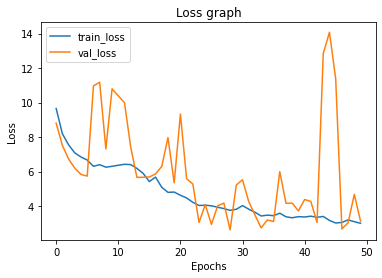

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.title("Loss graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [31]:
winner_X, winner_y = create_dataset(dataset[dataset.car_number == 12 ], time_steps=10, future_step=1)

In [32]:
prediction = model.predict(winner_X)

([<matplotlib.axis.YTick at 0x7f8456667128>,
 <a list of 11 Text major ticklabel objects>)

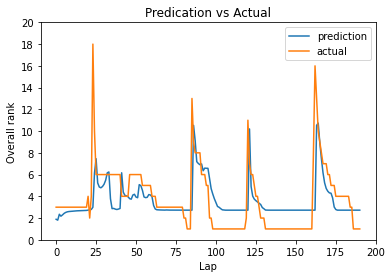

In [33]:
plt.plot(prediction[:,0])
plt.plot(winner_y)
plt.legend(['prediction', 'actual'])
plt.title("Predication vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(max(0,int(min(winner_y))-2), int(max(winner_y))+3, 2)))

In [34]:
model.predict(winner_X[0].reshape((1,10,16)))[0,0]

1.8878579

In [35]:
errors = abs(prediction[:,0] - winner_y)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 2.4277793087328883


## Task 2:

__Can you guess why the model performance is very bad?__

The dataset is highly imbalanced and hence the model was not able to learn much about the anomaly cases and is therefore biased.



In [36]:
index_of_normal_lap_times = np.argwhere(train_y[:,0] < 70)[:,0]

drop_indices = np.random.choice(index_of_normal_lap_times,len(index_of_normal_lap_times)//2)

In [37]:
new_train_X = np.delete(train_X,drop_indices, axis=0)
new_train_y = np.delete(train_y,drop_indices, axis=0)

In [38]:
history = model.fit(new_train_X, new_train_y, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/50
50/50 [==============================] - 1s 26ms/step - loss: 2.9028 - val_loss: 7.9754
Epoch 2/50
50/50 [==============================] - 0s 8ms/step - loss: 2.9856 - val_loss: 5.3895
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 3.0624 - val_loss: 5.7128
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 2.9911 - val_loss: 4.9063
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 3.1592 - val_loss: 3.2360
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 3.4927 - val_loss: 3.0666
Epoch 7/50
50/50 [==============================] - 0s 8ms/step - loss: 3.0810 - val_loss: 6.0893
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 3.0096 - val_loss: 2.8700
Epoch 9/50
50/50 [==============================] - 0s 8ms/step - loss: 2.9082 - val_loss: 3.6916
Epoch 10/50
50/50 [==============================] - 0s 9ms/step - loss: 2.7971 - val_loss: 4.0798
Epoch 11/50
50/50 

([<matplotlib.axis.YTick at 0x7f844c1a3828>,
 <a list of 11 Text major ticklabel objects>)

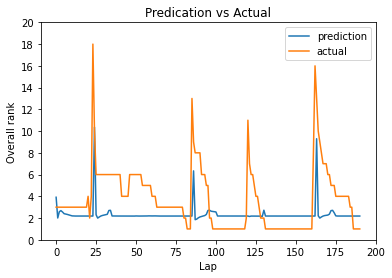

In [39]:
prediction = model.predict(winner_X)
plt.plot(prediction[:,0])
plt.plot(winner_y)
plt.legend(['prediction', 'actual'])
plt.title("Predication vs Actual")
plt.xlabel("Lap")
plt.ylabel("Overall rank")
plt.xticks(list(range(0, 201, 25)))
plt.yticks(list(range(max(0,int(min(winner_y))-2), int(max(winner_y))+3, 2)))

## Task 3:

__Can you guess what has changed?__

The model was able to learn more about the anomalies from the balanced dataset and hence was able to predict better.

## Lets save the model and data for Storm part.

In [40]:
model.save('lap_time.prediction.h5')

In [41]:
dataset.to_csv('cleaned_completed_laps.csv')

## Download the `lap_time.prediction.h5` and `cleaned_completed_laps.csv` files for the Apache Storm